In [1]:
import sys
sys.path.append('./')

from Analyzation_relative import Descriptive_statistics as DS
from Analyzation_relative import Regression as Reg
from Analyzation_relative.Statistical_inference import Normality_test

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools   #* 用于进行解释变量名称的遍历。
import sys
import seaborn as sns
import statsmodels.formula.api as smf
from  statsmodels.api import ProbPlot

from scipy.stats import norm


#*----------------------------------------------------------------
mpl.rcParams['font.sans-serif'] = ['SimHei'] # *允许显示中文
plt.rcParams['axes.unicode_minus']=False# *允许显示坐标轴负数
#*----------------------------------------------------------------

params = {'legend.fontsize': 7,}

plt.rcParams.update(params)

In [2]:
df = pd.read_csv("data/test_data.csv",encoding = "utf-8")
df.head(1)

,rent,bedroom,livingroom,bathroom,area,room,floor_grp,subway,region,heating
0,2730,2,1,1,12,1.0,2.0,1.0,通州,1.0


In [ ]:
fig , axes = plt.subplots(figsize = (8 , 8) , dpi = 150)
fig.patch.set_facecolor("white") #* 设置背景 以免保存的图片背景虚化
DS.Mosaic_plt(df[['bedroom' , 'region']] , ax = axes)
plt.show()

In [3]:
DS.DataLabeling(df)

[0, 2, 1, 1, 2, 1, 2, 1, 2, 1]

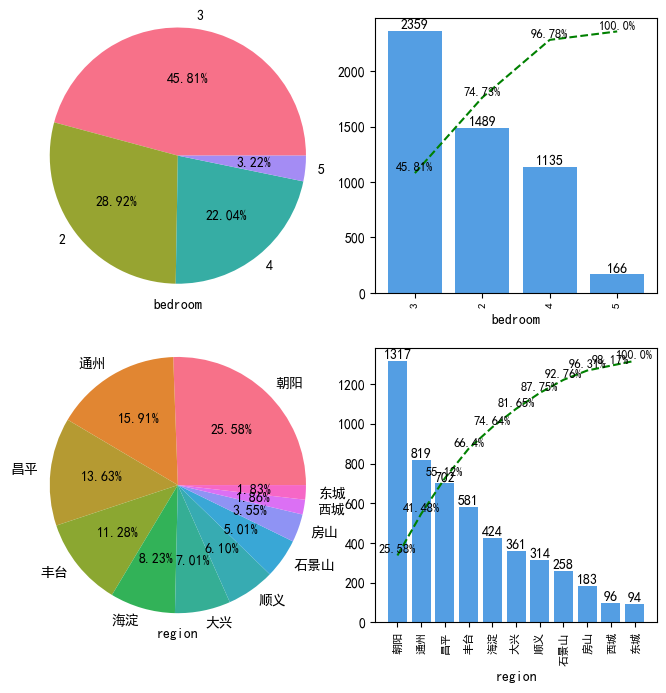

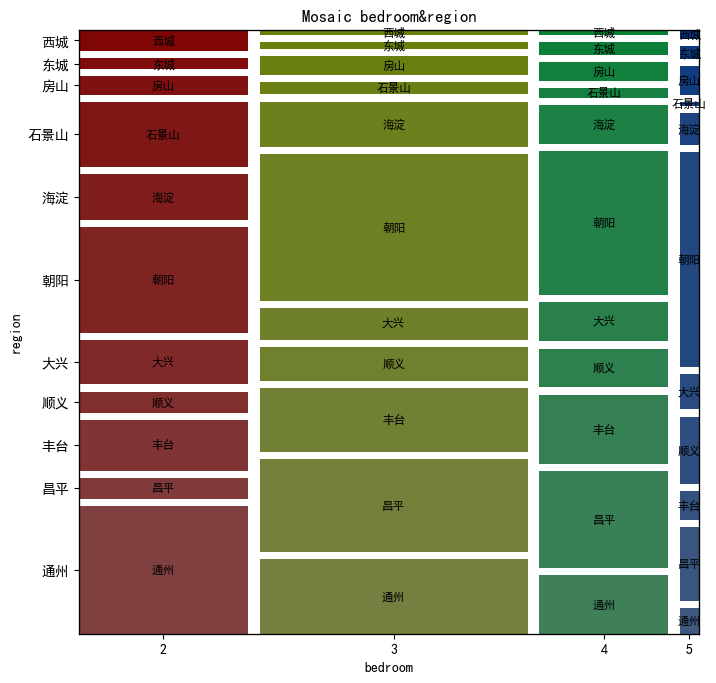

In [3]:
DS.Two_dim_autoplt(df[['bedroom' , 'region']] , [2 , 2] , dpi = 100)